# WeatherPy by Sherwin Macalintal
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

import openweathermapy.core as owm


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [24]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
settings = {"units":"imperial","appid":api_key}

info = []
views = {"summary":["name","sys.country","dt","coord.lon","coord.lat","main.humidity","clouds.all","main.temp_max", "wind.speed"]}
# Get data for each city in the cities_df

print("------------------------")
print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    try:
        data = owm.get_current(city,**settings)
        info.append(data.get_dict(views["summary"], split_keys=True))
        print (f"processing record for {city}")
    except:
        print(f"record not available for {city}")
    
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

------------------------
Beginning Data Retrieval
------------------------
processing record for mar del plata
processing record for chuy
processing record for busselton
processing record for albany
processing record for richards bay
record not available for karkaralinsk
processing record for castro
processing record for havelock
processing record for khatanga
processing record for bambous virieux
processing record for ushuaia
processing record for hualmay
processing record for ossora
processing record for rumoi
processing record for yuanping
processing record for cape town
processing record for miandrivazo
processing record for tuktoyaktuk
processing record for pandamatenga
processing record for rikitea
record not available for nguiu
record not available for ngukurr
record not available for illoqqortoormiut
processing record for doha
processing record for dikson
processing record for mataura
record not available for denau
processing record for port hedland
processing record for bethel

processing record for jumla
processing record for kanigiri
processing record for hernani
processing record for jalu
processing record for la rochelle
processing record for canto do buriti
processing record for kraljevo
processing record for saint-augustin
record not available for attawapiskat
processing record for altay
processing record for soubre
processing record for san quintin
processing record for hofn
processing record for kruisfontein
processing record for upernavik
processing record for sao filipe
record not available for korla
processing record for tame
processing record for norden
processing record for sagaing
processing record for buraydah
processing record for namatanai
processing record for beringovskiy
processing record for shimoda
processing record for veracruz
processing record for buchach
processing record for codrington
processing record for nuuk
processing record for japura
processing record for shagonar
processing record for eyl
processing record for ola
processing

processing record for yulara
processing record for kangaatsiaq
processing record for viransehir
processing record for mandurah
processing record for svetlogorsk
processing record for bin qirdan
processing record for oussouye
processing record for harlingen
processing record for acajutla
processing record for gizo
processing record for belyy yar
processing record for amposta
processing record for torbay
processing record for tarko-sale
processing record for nouakchott
record not available for betioky
record not available for samandag
processing record for agadez
processing record for saint anthony
processing record for port hardy
record not available for samusu
processing record for gaimersheim
processing record for tibati
processing record for borogontsy
processing record for kawalu
processing record for ferzikovo
processing record for marabba
processing record for maine-soroa
processing record for sikonge
processing record for douentza
processing record for ancud
processing record for

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
df = pd.DataFrame(info)
df.columns = ["City","Country","Date","Lon", "Lat","Humidity", "Cloudiness", "Max Temp", "Wind Speed"]
df.head()

,City,Country,Date,Lon,Lat,Humidity,Cloudiness,Max Temp,Wind Speed
0,Mar del Plata,AR,1570076088,-67.52,-46.43,37,0,46.48,7.56
1,Chuy,UY,1570076088,-53.46,-33.69,76,97,56.88,18.07
2,Busselton,AU,1570075921,115.35,-33.64,69,100,70.00,1.99
3,Albany,US,1570075801,-73.75,42.65,57,90,52.00,10.29
4,Richards Bay,ZA,1570076089,32.06,-28.77,73,0,66.17,26.42


In [27]:
df.to_csv(r'\cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

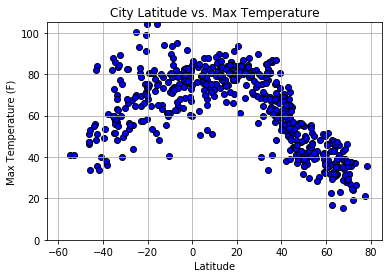

In [28]:
plt.scatter(df.Lat, df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

plt.ylim(0,105)
plt.xlim(-65,85)

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()

#### Latitude vs. Humidity Plot

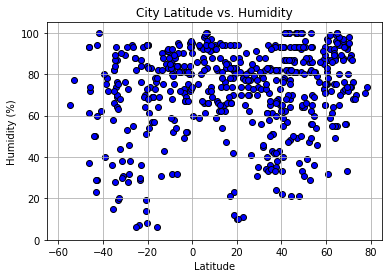

In [29]:
plt.scatter(df.Lat, df.Humidity, marker="o", facecolors="blue", edgecolors="black")

plt.ylim(0,105)
plt.xlim(-65,85)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()

#### Latitude vs. Cloudiness Plot

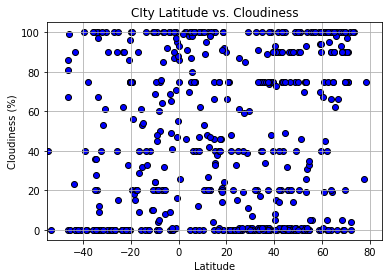

In [31]:
plt.scatter(df.Lat, df.Cloudiness, marker="o", facecolors="blue", edgecolors="black")

plt.ylim(-5,105)
plt.xlim(-55,85)

plt.title("CIty Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()

#### Latitude vs. Wind Speed Plot

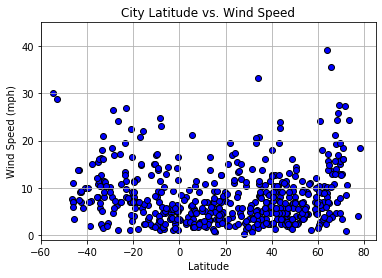

In [34]:
plt.scatter(df.Lat, df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

plt.ylim(-1,45)
plt.xlim(-60,85)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()